"We certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that we did not receive
any external help, coaching or contributions during the production of this work."

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import seaborn as sn

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
df= pd.read_csv('income_dataset.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
for i in df.columns:
    print (i,len(df[df[i] == '?']))

age 0
workclass 1836
fnlwgt 0
education 0
education.num 0
marital.status 0
occupation 1843
relationship 0
race 0
sex 0
capital.gain 0
capital.loss 0
hours.per.week 0
native.country 583
income 0


In [9]:
df = df[df['workclass'] != '?']
df = df[df['occupation'] != '?']
df = df[df['native.country'] != '?']

/Users/bhadrashah/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


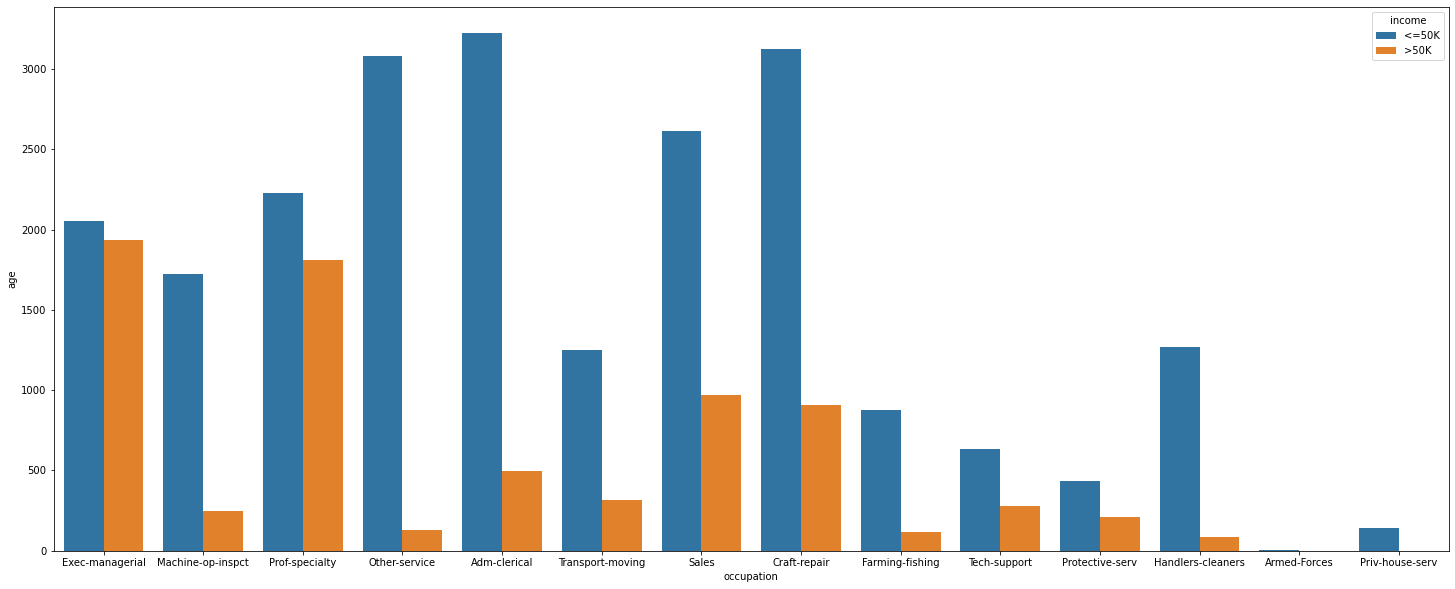

In [10]:
plt.figure(figsize=(25,10))
sn.countplot(df['occupation'], hue = df['income'])
plt.xlabel('occupation')
plt.ylabel('age')
plt.show()



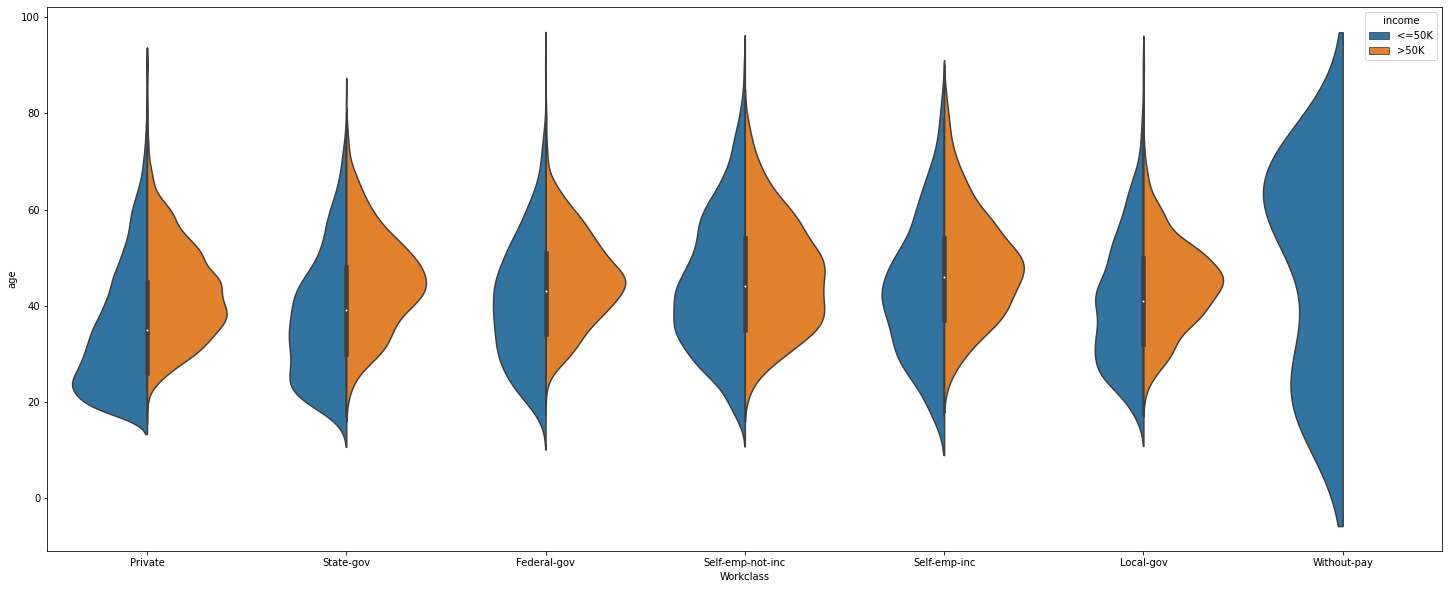

In [11]:
plt.figure(figsize=(25,10))
sn.violinplot(x="workclass", y="age", hue="income",data=df, split=True)
plt.xlabel('Workclass')
plt.ylabel('age')
plt.show()

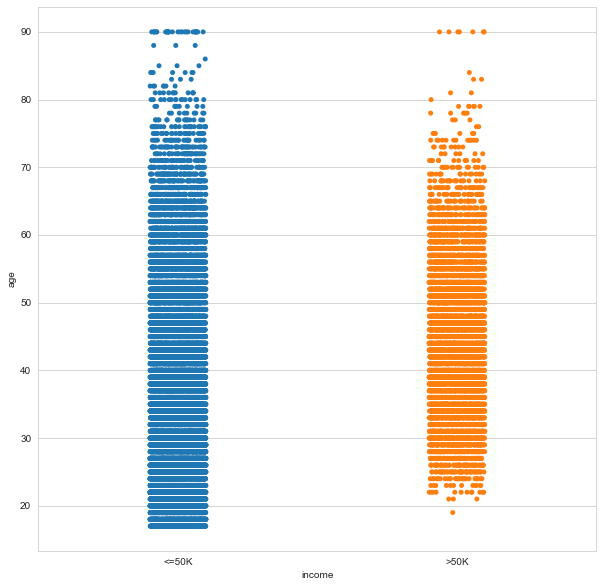

In [12]:
plt.figure(figsize=(10,10))
sn.set_style("whitegrid")
sn.stripplot(x = 'income', y = 'age', data = df)
plt.xlabel('income')
plt.ylabel('age')
plt.show()

Text(0, 0.5, 'Count')

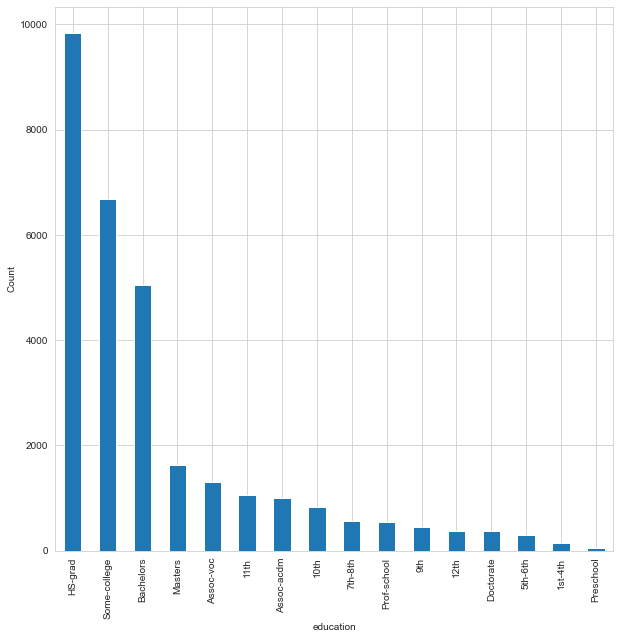

In [13]:
plt.figure(figsize=(10,10))
df['education'].value_counts().plot(kind='bar')
plt.xlabel('education')
plt.ylabel('Count')

In [14]:
df['education'] = df['education'].astype("category")
df['relationship'] = df['relationship'].astype("category")
df['marital.status'] = df['marital.status'].astype("category")
df['occupation'] = df['occupation'].astype("category")
df['race'] = df['race'].astype("category")
df['native.country'] = df['native.country'].astype("category")
df['income'] = df['income'].astype("category")



In [15]:
print (df['education'].cat.categories)
print (df['relationship'].cat.categories)
print (df['marital.status'].cat.categories)
print (df['occupation'].cat.categories)
print (df['race'].cat.categories)
print (df['native.country'].cat.categories)
print (df['income'].cat.categories)

Index(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype='object')
Index(['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried',
       'Wife'],
      dtype='object')
Index(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype='object')
Index(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving'],
      dtype='object')
Index(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'], dtype='object')
Index(['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic',
       'Ecuador', 'El-Salv

In [16]:
df['income'].replace(['<=50K','>50K'],[1,0],inplace=True)
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,1
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,1
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,1
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,1
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,0
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,1
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


<AxesSubplot:>

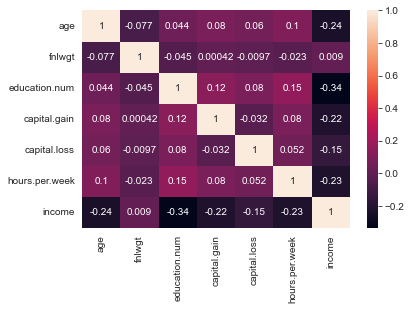

In [17]:
sn.heatmap(df.corr(),annot=True)

In [18]:
df_new = pd.get_dummies(df[['age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'
       ]])
df_new.head(10)

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,9,0,4356,18,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,4,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,10,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,9,0,3770,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,38,6,0,3770,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,74,16,0,3683,20,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,68,9,0,3683,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,45,16,0,3004,35,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
11,38,15,0,2824,45,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
12,52,13,0,2824,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
df_new = scaler.fit_transform(df_new)



In [20]:
df_new

array([[0.89041096, 0.53333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.50684932, 0.2       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.32876712, 0.6       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.31506849, 0.53333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.56164384, 0.53333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.06849315, 0.53333333, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [21]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.751078
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [22]:
from sklearn.model_selection import train_test_split
y = df.iloc[:, 14].values
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.2, random_state=25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(24129, 96)
(6033, 96)
(24129,)
(6033,)


In [23]:
# Define the neural network model
from keras import models
from keras import layers



model = models.Sequential()
model.add(layers.Dense(units= 100,activation='relu',input_dim=X_train.shape[1]))
model.add(layers.Dense(units= 105,activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


Metal device set to: Apple M1


2022-04-20 09:47:43.737259: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-20 09:47:43.737689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### Plottings for train set and test set 

In [27]:
modelfit_validation=model.fit(X_train, y_train,batch_size=32, epochs=40,validation_data=(X_test,y_test                      )

Epoch 1/40
755/755 [==============================] - 6s 9ms/step - loss: 0.3067 - accuracy: 0.8617 - val_loss: 0.3291 - val_accuracy: 0.8512
Epoch 2/40
755/755 [==============================] - 6s 8ms/step - loss: 0.3060 - accuracy: 0.8620 - val_loss: 0.3273 - val_accuracy: 0.8515
Epoch 3/40
755/755 [==============================] - 6s 7ms/step - loss: 0.3048 - accuracy: 0.8630 - val_loss: 0.3287 - val_accuracy: 0.8520
Epoch 4/40
755/755 [==============================] - 6s 8ms/step - loss: 0.3057 - accuracy: 0.8632 - val_loss: 0.3288 - val_accuracy: 0.8536
Epoch 5/40
755/755 [==============================] - 6s 7ms/step - loss: 0.3048 - accuracy: 0.8639 - val_loss: 0.3312 - val_accuracy: 0.8502
Epoch 6/40
755/755 [==============================] - 6s 7ms/step - loss: 0.3055 - accuracy: 0.8627 - val_loss: 0.3276 - val_accuracy: 0.8513
Epoch 7/40
755/755 [==============================] - 6s 7ms/step - loss: 0.3049 - accuracy: 0.8629 - val_loss: 0.3291 - val_accuracy: 0.8498
Epoch 

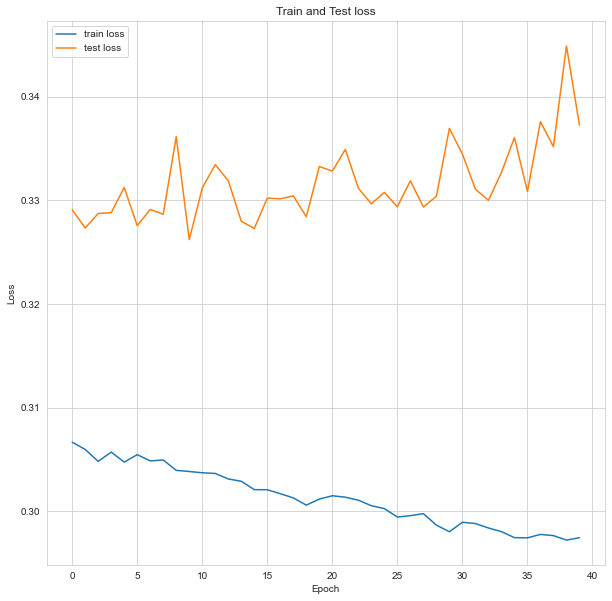

In [28]:
plt.figure(figsize=(10,10))
plt.plot(modelfit_validation.history['loss'])
plt.plot(modelfit_validation.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Train and Test loss')
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.show()

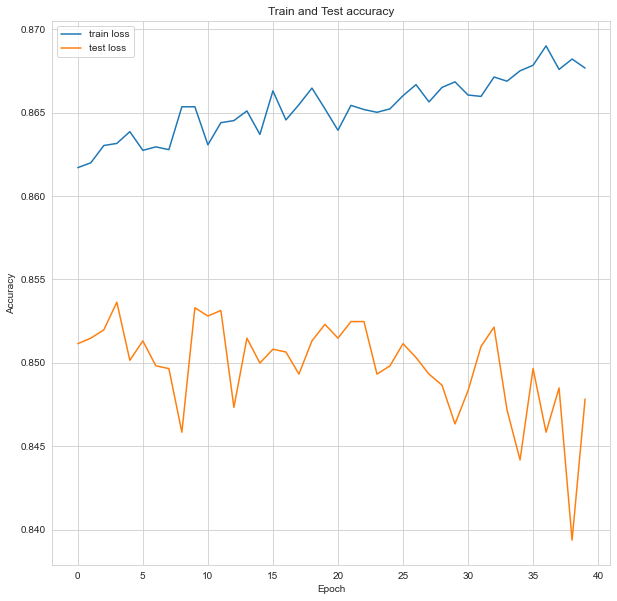

In [29]:
plt.figure(figsize=(10,10))
plt.plot(modelfit_validation.history['accuracy'])
plt.plot(modelfit_validation.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Train and Test accuracy')
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.show()

In [30]:
evalu = model.evaluate(X_test, y_test,batch_size=35)
print(' Test set loss:', evalu[0])
print('Test set accuracy:', evalu[1])

173/173 [==============================] - 1s 4ms/step - loss: 0.3373 - accuracy: 0.8478
 Test set loss: 0.3372510075569153
Test set accuracy: 0.8478369116783142
